# SLO Twitter Data Analysis  - Tweet #Hashtag Statistics

Setup the Jupyter Notebook kernel for SLO data analysis.

In [2]:
import logging as log
import warnings
import time
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Import custom utility functions.
import slo_twitter_data_analysis_utility_functions as tweet_util_v2

#############################################################
# Adjust parameters to display all contents.
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.width = None
pd.options.display.max_colwidth = 1000
# Seaborn setting.
sns.set()
# Set level of precision for float value output.
pd.set_option('precision', 12)
# Ignore these types of warnings - don't output to console.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Matplotlib log settings.
mylog = log.getLogger("matplotlib")
mylog.setLevel(log.INFO)

"""
Turn debug log statements for various sections of code on/off.
(adjust log level as necessary)
"""
log.basicConfig(level=log.INFO)


# Import CSV dataset and convert to dataframe.
tweet_dataframe = tweet_util_v2.import_dataset(
    "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/"
    "twitter-dataset-6-27-19.csv",
    "csv", False)

d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\IPython\core\interactiveshell.py:3209: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


## Graph of Hashtag Count by Percentage of All Tweets Associated with Given Company:


Plots the number of hashtags Tweets possess against the percentage of all Tweets associated with a given company that possess that number of hashtags.<br>



The Number of Hashtags within each Tweet:
Hashtag Count for Tweets by Percentage of All Tweets Associated with a Given Company:


<Figure size 432x288 with 0 Axes>

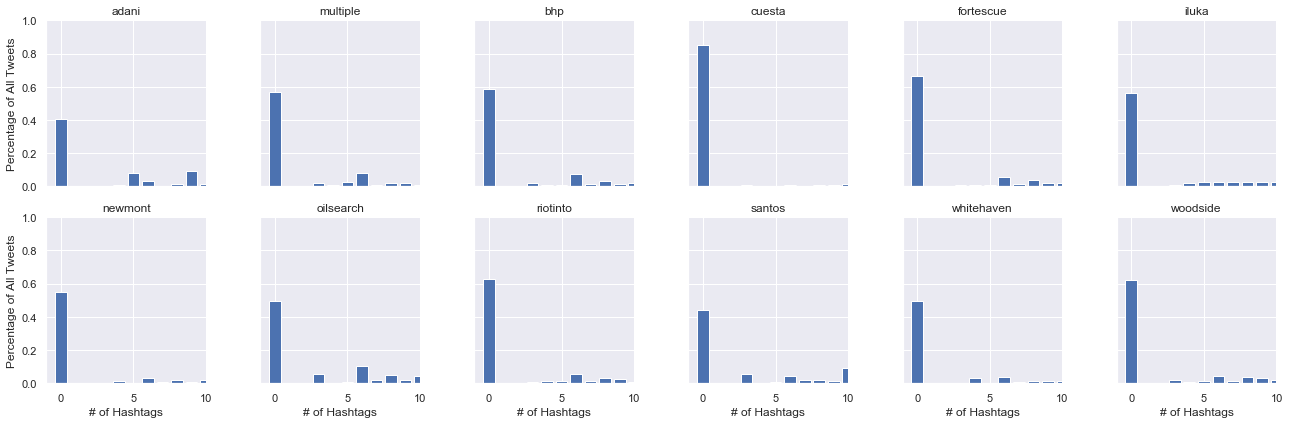

In [2]:
    print(f"The Number of Hashtags within each Tweet:")
    tweet_dataframe['#hashtags'] = tweet_dataframe['tweet_entities_hashtags'].apply(
        lambda x: len(x) if x is not None and not isinstance(x, float) else 0)
    # companies = df['company']

    print("Hashtag Count for Tweets by Percentage of All Tweets Associated with a Given Company:")
    plt.figure()
    grid = sns.FacetGrid(
        tweet_dataframe[['#hashtags', 'company_derived_designation']], col='company_derived_designation', col_wrap=6,
        ylim=(0, 1), xlim=(-1, 10))
    grid.map_dataframe(tweet_util_v2.bar_plot, '#hashtags')
    grid.set_titles('{col_name}')
    grid.set_xlabels("# of Hashtags").set_ylabels("Percentage of All Tweets")
    plt.show()


Most Tweets for each company have no associated hashtags; some have quite a few.



## Percentage of Tweets with Hashtags in Dataset:

In [3]:
    has_hashtag = tweet_dataframe['tweet_entities_hashtags'].count()
    print(f"The number of Tweets with hashtags is {has_hashtag}")
    print(f"The percentage of Tweets with hashtags is {has_hashtag / tweet_dataframe.shape[0] * 100.0}")

The number of Tweets with hashtags is 367217
The percentage of Tweets with hashtags is 54.77392631219394



Overall, around half of our Tweets possesss a hashtag of some sort.<br>



In [4]:
    adani_tweets = tweet_dataframe.loc[tweet_dataframe["company_derived_designation"] == "adani"]
    print(f"The number of Adani Tweets is {adani_tweets.shape[0]}")

    adani_tweets["#hashtags_adani"] = adani_tweets['tweet_entities_hashtags'].apply(
        lambda x: len(x) if x is not None and not isinstance(x, float) else 0)

    adani_tweets_has_hashtags = adani_tweets.loc[adani_tweets["#hashtags_adani"] > 0]
    print(f"The number of Adani Tweets with hashtags is {adani_tweets_has_hashtags.shape[0]}")
    print(f"The number of Adani Tweets without hashtags is "
          f"{adani_tweets.shape[0] - adani_tweets_has_hashtags.shape[0]}")

    print(f"Percentage Adani Tweets with hashtags: "
          f"{adani_tweets_has_hashtags.shape[0] / adani_tweets.shape[0] * 100}")
    print(f"Percentage Adani Tweets without hashtags: "
          f"{(1 - adani_tweets_has_hashtags.shape[0] / adani_tweets.shape[0]) * 100}")

The number of Adani Tweets is 431019


d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


The number of Adani Tweets with hashtags is 255992
The number of Adani Tweets without hashtags is 175027
Percentage Adani Tweets with hashtags: 59.39227737060315
Percentage Adani Tweets without hashtags: 40.60772262939685
